In [ ]:
# Import modules and packages
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from time import time
import math
import seaborn as sns
import datetime as dt
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.utils import resample
%matplotlib inline

In [ ]:
#Importing Training Set
df = pd.read_csv('Dataset.csv')

dataset_train = pd.read_csv('Dataset.csv')
#Separate dates for future plotting

In [ ]:
# Select features (columns) to be involved intro training and predictions
cols = list(dataset_train)[1:9]

# Extract dates (will be used in visualization)
datelist_train = list(dataset_train['DATETIME'])
datelist_train = [dt.datetime.strptime(date, '%d/%m/%y %H').date() for date in datelist_train]
#print(datelist_train)
#print(dataset_train)
print('Training set shape == {}'.format(dataset_train.shape))
print('All timestamps == {}'.format(len(datelist_train)))
print('Featured selected: {}'.format(cols))

Training set shape == (6266, 12)
All timestamps == 6266
Featured selected: [' L_T1', ' L_T2', ' L_T3', ' L_T4', ' L_T5', ' L_T6', ' L_T7', 'FLAG']


In [ ]:
dataset = df[cols].astype(str)
#print(len(dataset1))
#for i in cols:
  #for j in range(0, len(dataset1)):
      #dataset[i][j] = dataset1[i][j].replace(',', '')


dataset_train = dataset[:].astype(float)
dataset_test = dataset[4177:].astype(float)

dataset_T = dataset.astype(float).values   
# Using multiple features (predictors)
training_set = dataset_train.values
testing_set = dataset_test.values

print('Shape of training set == {}.'.format(training_set.shape))
print('Shape of testing set == {}.'.format(testing_set.shape))

print(testing_set)

Shape of training set == (6266, 8).
Shape of testing set == (2089, 8).
[[0.73 2.27 4.   ... 5.5  4.28 0.  ]
 [0.69 2.25 4.53 ... 5.5  4.78 0.  ]
 [0.9  2.31 5.03 ... 5.16 3.22 0.  ]
 ...
 [1.07 2.24 2.99 ... 5.12 1.78 0.  ]
 [0.85 2.14 3.44 ... 5.24 1.82 0.  ]
 [0.74 2.11 3.89 ... 5.29 1.62 0.  ]]


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#sc = MinMaxScaler(feature_range=(0, 1))
sc = StandardScaler()
datasetTotal=dataset_train.values
dataset_scaled = sc.fit_transform(datasetTotal[:, 0:7])

training_set_scaled= dataset_scaled[:4177]
test_set_scaled =dataset_scaled[4177:]
print(training_set_scaled.shape)
print(test_set_scaled.shape)

labelX = datasetTotal[:4177, 7:8]
labelY = datasetTotal[4177:, 7:8]
print(labelY.shape)
print(labelX.shape)

#sc_predict = MinMaxScaler(feature_range=(0, 1))
#sc_predict.fit_transform(dataset_T[:, 0:])
#labelX = np.reshape(labelX, (labelX.shape[0], 1, labelX.shape[1]))

#trainX = np.reshape(training_set_scaled, (training_set_scaled.shape[0], 1, training_set_scaled.shape[1]))

#print(training_set_scaled)
print(labelX.shape)

(4177, 7)
(2089, 7)
(2089, 1)
(4177, 1)
(4177, 1)


In [ ]:

labelX = np.reshape(labelX, (labelX.shape[0],))
...
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(labelX)
encoded_Y = encoder.transform(labelX)
print(labelX.shape)
weight_for_0 = 1.0 / 3958
weight_for_1 = 1.0 / 219
print(labelX)
print(weight_for_0)

(4177,)
[0. 0. 0. ... 0. 0. 0.]
0.00025265285497726126


In [ ]:

labelY = np.reshape(labelY, (labelY.shape[0],))
...
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(labelY)
encoded_TY = encoder.transform(labelY)
print(encoded_TY.shape)

(2089,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
from keras.layers import LSTM, GRU, Conv1D, Conv1DTranspose
from keras.layers import Dropout, Activation
from tensorflow.keras.layers import LeakyReLU
#from tensorflow.keras.metrics.Precision
from keras import regularizers
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.metrics import AUC
from sklearn.metrics import roc_auc_score, auc
from keras import metrics
EPOCHS = 200
INIT_LR = 1e-3
BS = 32

In [ ]:
  ## Initializing the Neural Network based on LSTM
#def create_baseline():
model = Sequential()
model.add(Dense(units=512, input_dim=7, activation= 'relu', kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.0007)))
    #model.add(BatchNormalization())
    #model.add(Activation('relu'))
            

    #model.add(Dropout(0.1))
model.add(Dense(units=256, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.0007)))
#model.add(Dropout(0.1))
model.add(Dense(units=128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.0007)))
#model.add(Dropout(0.1))
    #model.add(Dense(units=128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.0007)))
    #model.add(Dropout(0.1))
    #model.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.0007)))
    #model.add(Dropout(0.1))
model.add(Dense(units=64, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.0007)))
#model.add(Dropout(0.1))
model.add(Dense(units=32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.0007)))
#model.add(Dropout(0.1))
model.add(Dense(units=16, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.00001, l2=0.0007)))
#model.add(Dropout(0.1))
model.add(Dense(units=1, activation='sigmoid'))
    #opt = Adam(learning_rate=0.001, decay=0.000003)
opt= Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

metrics = [
    metrics.FalseNegatives(name="fn"),
    metrics.FalsePositives(name="fp"),
    metrics.TrueNegatives(name="tn"),
    metrics.TruePositives(name="tp"),
    metrics.Precision(name="precision"),
    metrics.Recall(name="recall"),
]
model.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])
    #return model    


#Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
#model.summary()

In [ ]:
def define_model():
    model = Sequential()
    #define first hidden layer and visible layer , kernel_initializer='he_uniform'
    model.add(Dense(512, input_dim=7, activation='relu', kernel_regularizer=regularizers.l2(l2=0.005)))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l2=0.005)))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(l2=0.005)))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2=0.005)))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2=0.005)))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2=0.005)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    opt= Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

    lr_schedule = ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=50,
    decay_rate=0.9)
    optimizer = SGD(learning_rate=lr_schedule)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [ ]:
model = define_model()
class_weight = {0: 1, 1: 1}
history= model.fit(training_set_scaled, encoded_Y, shuffle=False, epochs=500, batch_size=32, validation_split=0.3, class_weight=class_weight, verbose=1)



Epoch 1/500
92/92 [==============================] - 2s 9ms/step - loss: 2.2325 - accuracy: 0.9436 - val_loss: 0.9007 - val_accuracy: 0.9362
Epoch 2/500
92/92 [==============================] - 1s 7ms/step - loss: 0.6333 - accuracy: 0.9524 - val_loss: 0.5260 - val_accuracy: 0.9362
Epoch 3/500
92/92 [==============================] - 1s 7ms/step - loss: 0.4343 - accuracy: 0.9524 - val_loss: 0.4318 - val_accuracy: 0.9362
Epoch 4/500
92/92 [==============================] - 1s 6ms/step - loss: 0.3618 - accuracy: 0.9524 - val_loss: 0.3862 - val_accuracy: 0.9362
Epoch 5/500
92/92 [==============================] - 1s 6ms/step - loss: 0.3276 - accuracy: 0.9524 - val_loss: 0.3576 - val_accuracy: 0.9362
Epoch 6/500
92/92 [==============================] - 1s 6ms/step - loss: 0.3077 - accuracy: 0.9524 - val_loss: 0.3369 - val_accuracy: 0.9362
Epoch 7/500
92/92 [==============================] - 1s 6ms/step - loss: 0.2928 - accuracy: 0.9524 - val_loss: 0.3214 - val_accuracy: 0.9362
Epoch 8/500
9

In [ ]:
#es = EarlyStopping(monitor='val_loss', min_delta=1e-10, patience=400, verbose=1)
#rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=15, verbose=1)
#mcp = ModelCheckpoint(filepath='weights.h5', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

#tb = TensorBoard('logs') , callbacks=[es, rlr, mcp, tb]
history= model.fit(training_set_scaled, encoded_Y, shuffle=False, epochs=3000, batch_size=32, validation_split=0.3, class_weight=class_weight, verbose=1)

In [ ]:
model.evaluate(test_set_scaled, encoded_TY)

66/66 [==============================] - 0s 3ms/step - loss: 0.3984 - accuracy: 0.8827


[0.39839044213294983, 0.8827189803123474]

In [ ]:
yhat = model.predict(test_set_scaled)
score = roc_auc_score(encoded_TY, yhat)
print('ROC AUC: %.3f' % score)

ROC AUC: 0.506


In [ ]:
prediction= model.predict(test_set_scaled)

my_accuracy = accuracy_score(labelY, prediction.round())
print("My accuracy is=", my_accuracy)

my_precision = precision_score(labelY, prediction.round())
print("My precesion score is=", my_precision)

In [ ]:
# evaluate baseline model with standardized dataset
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_baseline, epochs=300, batch_size=64, verbose=1)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True)
results = cross_val_score(pipeline, training_set_scaled, encoded_Y, cv=kfold)
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
print("Standardized: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Standardized: 94.61% (0.30%)


In [ ]:
pred=create_baseline()

In [ ]:
#test= testing_set[:, 0:7]
print(test)
labelY = np.reshape(labelY, (labelY.shape[0],))
...
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(labelY)
encoded_Y = encoder.transform(labelY)
#print(labelY[1589:1600])

In [ ]:
cvscores = []
scores = model.evaluate(test_set_scaled, labelY, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

66/66 [==============================] - 0s 3ms/step - loss: 3.1184 - accuracy: 0.8430
accuracy: 84.30%
84.30% (+/- 0.00%)


In [ ]:
predicted=model.predict(test)
print(predicted)
plt.plot(predicted)

plt.show()

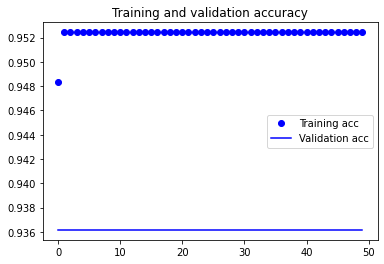

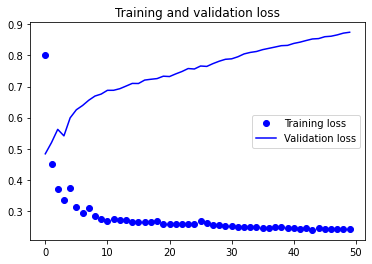

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss.png', dpi=500, bbox_inches='tight')
plt.show()

In [ ]:
labeltest = testY.astype(int)
labeltest = indices_to_one_hot(labeltest, nb_classes)
#trainY = trainY[1:]
print(testX.shape)

In [ ]:
#opt = Adam(learning_rate=INIT_LR, decay=(INIT_LR*10 / EPOCHS))
#model.compile(loss='binary_crossentropy', optimizer =opt, metrics=['accuracy'])
#model.compile(optimizer =RMSprop(learning_rate=0.004), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
print(Y_test_pred[1590])

In [ ]:
import numpy as np
nb_classes = 2
label = dataset_train[' ATT_FLAG'].astype(int)
def indices_to_one_hot(data, nb_classes):
    """Convert an iterable of indices to one-hot encoded labels."""
    targets = np.array(data).reshape(-1)
    return np.eye(nb_classes)[targets]

labeled = indices_to_one_hot(label, nb_classes)
labeled = np.reshape(labeled, (labeled.shape[0], labeled.shape[1],))
#trainY = trainY[1:]
print(labeled.shape)
print(training_set_scaled.shape)

In [ ]:
seq_size =1
print(len(training_set_scaled))
def to_sequence(x, seq_size=1):
    x_values = []
    for i in range (len(x)):
        x_values.append(x[i:(i+seq_size)])
        
    return np.array(x_values)

trainX = to_sequence(training_set_scaled, seq_size)
testX = to_sequence(test_set_scaled, seq_size)

print(trainX.shape)
#print(trainY.shape)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[2],))
testX = np.reshape(testX, (testX.shape[0], testX.shape[2],))
print(testX.shape)
print(trainX)

In [ ]:

# baseline model
def create_baseline():

  model = Sequential()
  model.add(Conv1D(filters=32, kernel_size=7, padding="same", strides=2, activation="relu", input_shape=(1,7)))

  model.add(Dropout(rate=0.2))

  model.add(Conv1D(filters=64, kernel_size=7, padding="same", strides=2, activation="relu"))
  model.add(Dropout(rate=0.2))

  model.add(Conv1D(filters=128, kernel_size=7, padding="same", strides=2, activation="relu"))
  model.add(Dropout(rate=0.2))
  model.add(Conv1D(filters=256, kernel_size=7, padding="same", strides=2, activation="relu"))
  model.add(Dropout(rate=0.2))
  model.add(Flatten())
  model.add(Dense(units=128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(units=1, activation='linear'))


  opt = Adam(learning_rate=INIT_LR, decay=(INIT_LR*10 / EPOCHS))
  model.compile(optimizer= opt, loss="mae", metrics=['accuracy'])
  return model
model.summary()